<a href="https://colab.research.google.com/github/V-dit/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Final_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# Importing important libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Link the drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the csv as pandas dataframe
filepath = '/content/drive/MyDrive/Colab Notebooks/EDA Capstone Project/Hotel Booking/Hotel Bookings.csv'
hotel_df = pd.read_csv(filepath)

In [4]:
# Viewing the data
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [5]:
hotel_df.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


**Preprocessing:**
1. Inspecting the data. - Here first viewed the information of data with .info() command. However, isnull().sum() serves to be more appealing. Hence, using it to spot the null values.

  1. Inspecting the data for null values
  2. Missing features in the data
  3. Get the basics stastics for each feature.

2. We will create a new dataframe and deal with the null values by replacing it with appropriate values or may be drop them. This way we do not make any changes to the raw data.

**1. Inspecting the data for null values**

In [16]:
# Inspecting the data
hotel_df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

**2.   Missing features in the data**

From this we can device that the following columns have null values, hence first we need to work on correcting these featuers:
'agent', 'company', 'country', 'children'

1. 'agent' - This refers to the agent Id.
  When the field is null, it means those customers/ bookings as direct to hotel, hence we need not omit them from the count. However, we can have a different class defined for them. The data amounts to '16340' rows hence, to retain the data of other associated columns we can replace the null values (NaN) with '0'.

2. 'company' - This refers to the employees belonging to a certain company. Hence if the field is null, it indicates the non employee trips. These could be the self funded trips. While the others could be funded by the company. So, here as well we can replace the null values (NaN) with '0'.

3. 'country'- Ideally every customer must belong to a unique country. Hence this field cannot be empty. We could either drop the rows containing the null values or replace them with mean/median or mode of the data. Here mode might be suitable because it means we will take the value with maximum occurance and fill it in place of the null values. This data is however quite less in number ('488' rows only) when compared to the volume of data. So, it might not have a  significant impact on the analysis.

4. 'children' - Null values may simply imply zero children. This case can be handeled similar to the preivous one. However, the impact on analysis will be low as the number of rows is just '4'.

**3.   Get the basics stastics for each feature.**

In [19]:
# To get the basic statistical data of each column. This can be used to draw useful conclusions in different aspects.
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [21]:
# Viewing all the column names
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [22]:
# Creating a copy of the dataframe to avoid manipulation of the raw data.
df = hotel_df.copy()

**Replacing the null values:**

In [24]:
# Replace the NaN values in 'agent'and 'company' columns with 0.
df[['agent', 'company']] = df[['agent', 'company']].fillna(0)

In [26]:
# Finding the mode of country to get the country name with maximum occurance.
df['country'].mode()
# Here, we found portuguese as the maximum occurance. So we replace the nan values with the same.

0    PRT
dtype: object

In [27]:
# Replace the NaN values in 'agent'and 'company' columns with 0.
df['country'] = df['country'].fillna(df['country'].mode())

In [28]:
# Replace the NaN values in 'children' column with 0.
df['children'] = df['children'].fillna(0)

In [169]:
df['is_canceled'] = df['is_canceled'].replace([0,1], ['Not Cancelled', 'Cancelled'])

**Looking at the data types of each feature.**

In [30]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [32]:
# Convert 'çhildren' from float to integer.
df['children'] = df['children'].astype('int64')
# Convert 'agent' from float to integer.
df['agent'] = df['agent'].astype('int64')
# Convert 'company' from float to integer.
df['company'] = df['company'].astype('int64')

**Creating Functions:**

In [33]:
# To find the percentage value for any column
def convert_to_percentage(pdseries, limit = None):
  if limit != None:
    pdseries = pdseries.value_counts()[:limit]
  else:
    pdseries = pdseries.value_counts()
  x = pdseries.index
  y = (pdseries/pdseries.sum()) * 100

  return x, y

**Getting the names of hotels**

In [35]:
# Getting the names of all hotels included in the data.
hotel_names = df['hotel'].unique()
print(f'The hotel names are: {hotel_names}')

The hotel names are: ['Resort Hotel' 'City Hotel']


**Basic Analysis of Agents:**

In [36]:
# Getting the list of agents in the list
agent_ids = sorted(df['agent'].dropna().unique())
print(f'The agent ids are: {agent_ids}')

# Total number of agents in the list
print(f'The total number of agents in the above list is: {len(agent_ids)}')

# How many bookings came through agents
not_by_agent = df['agent'].isna().sum()
print(f'Total bookings that came by means of agents is: {119390 - int(not_by_agent)}/119390')

The agent ids are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 47, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 103, 104, 105, 106, 107, 110, 111, 112, 114, 115, 117, 118, 119, 121, 122, 126, 127, 128, 129, 132, 133, 134, 135, 138, 139, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 162, 163, 165, 167, 168, 170, 171, 173, 174, 175, 177, 179, 180, 181, 182, 183, 184, 185, 187, 191, 192, 193, 195, 196, 197, 201, 205, 208, 210, 211, 213, 214, 215, 216, 219, 220, 223, 227, 229, 232, 234, 235, 236, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 256, 257, 258, 261, 262, 265, 267, 269, 270, 273, 275, 276, 278, 280, 281, 282, 283, 285, 286, 287, 288, 289, 290, 291, 294, 295, 296, 298

Text(0, 0.5, 'Booking Percentage')

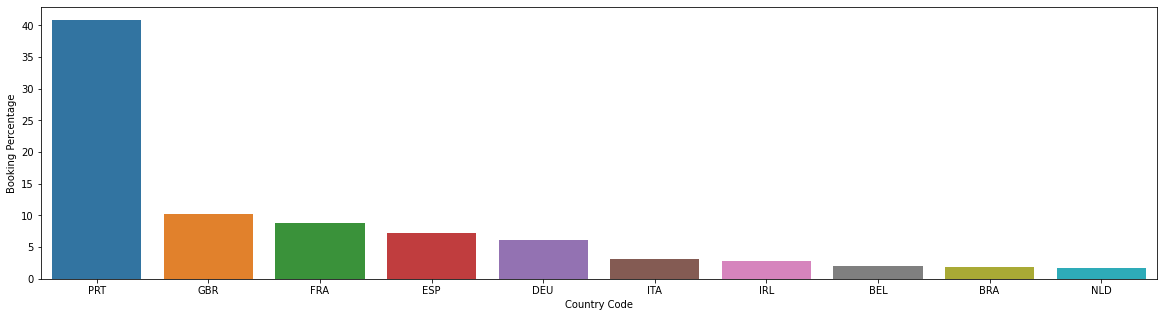

In [303]:
# Plot the percentage of booking/ customers from top 10 countries
x, y = convert_to_percentage(df['country'])
plot1 = sns.barplot(x = x[:10], y = y[:10])
plot1.set_xlabel('Country Code')
plot1.set_ylabel('Booking Percentage')

**Basic Analysis of possible Company tours and/ or personal tour :**

In [37]:
# Getting the ids of all companies included in the data
company_ids = sorted(df['company'].dropna().unique())
print(f'The company ids are: {company_ids}')

# Total number of companies in the list
print(f'The total number of companies in the above list is: {len(company_ids)}')

# Total bookings that do not belong to any company
private_customers = df['company'].isna().sum()
print(f'Total {private_customers} customers do not belong to any company.')

The company ids are: [0, 6, 8, 9, 10, 11, 12, 14, 16, 18, 20, 22, 28, 29, 31, 32, 34, 35, 37, 38, 39, 40, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 59, 61, 62, 64, 65, 67, 68, 71, 72, 73, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 88, 91, 92, 93, 94, 96, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 115, 116, 118, 120, 122, 126, 127, 130, 132, 135, 137, 139, 140, 142, 143, 144, 146, 148, 149, 150, 153, 154, 158, 159, 160, 163, 165, 167, 168, 169, 174, 178, 179, 180, 183, 184, 185, 186, 192, 193, 195, 197, 200, 202, 203, 204, 207, 209, 210, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 229, 230, 232, 233, 234, 237, 238, 240, 242, 243, 245, 246, 250, 251, 253, 254, 255, 257, 258, 259, 260, 263, 264, 268, 269, 270, 271, 272, 273, 274, 275, 277, 278, 279, 280, 281, 282, 284, 286, 287, 288, 289, 290, 291, 292, 293, 297, 301, 302, 304, 305, 307, 308, 309, 311, 312, 313, 314, 316, 317, 318, 319, 320, 321, 323, 324, 325, 329, 330, 331, 332, 333, 33

**Basic Analysis of Countries:**

In [38]:
# Getting the country of origin for customers included in the data
countrywise_customer = sorted(df['country'].dropna().unique())
print(f'The customers come from these countries: {countrywise_customer}')

# Total number of countries in the list
print(f'Customers from {len(company_ids)} different countries visited these two hotels.')

The customers come from these countries: ['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA', 'ATF', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CAF', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'CN', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB', 'GLP', 'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'MYT', 'NAM', 'NCL', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL', 'PRI', 'PRT', 'PRY', 

**For each hotel, looking at the number of countries from which the customers come:**

In [39]:
# Groupby Hotel Name to get the country of origin of customers for each hotels.
grouped_hotel_country = df.groupby(['hotel'])['country']

# Get list of countires for each hotel
resort_hotel_country_list = grouped_hotel_country.get_group('Resort Hotel').unique()
city_hotel_country_list = grouped_hotel_country.get_group('City Hotel').unique()

print(f'Hotel "Resort Hotel" has got customers visiting from {len(resort_hotel_country_list)} different countries.')
print(f'Hotel "City Hotel" has got customers visiting from {len(city_hotel_country_list)} different countries.')

Hotel "Resort Hotel" has got customers visiting from 126 different countries.
Hotel "City Hotel" has got customers visiting from 167 different countries.


([<matplotlib.patches.Wedge at 0x7f92c42b9450>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(0.9564161333812984, 0.5433858480011848, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.52168152729889, 0.29639228072791896, '33.6%')])

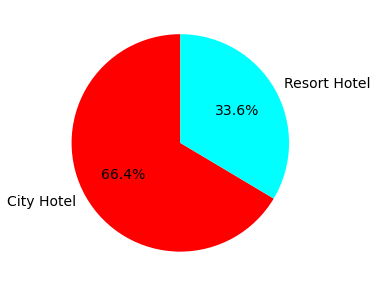

In [175]:
# Plotting the data in pie chart.
fig1 = plt.rcParams['figure.figsize'] = 5,5
labels = df['hotel'].value_counts().index.tolist()
values = df['hotel'].value_counts().tolist()
colors = ['red','cyan']
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

In [54]:
hotel_adults = df.groupby(['hotel'])['adults']
hotel_adults.describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [199]:
# Defining function for countplot
def countplot(data, x, hue, title = None, x_label = None, y_label = None, rotate = None):
  plot = sns.countplot(data=data, x = x, hue = hue)
  plt.legend(loc='upper right')
  plot.set_title(title)
  if rotate == None:
    plt.xticks(rotation = 90)
  else:
    plt.xticks(rotation = rotate)
  plot.set_xlabel(x_label)
  plot.set_ylabel(y_label)
  plt.show()

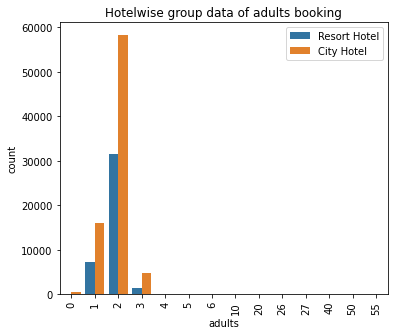

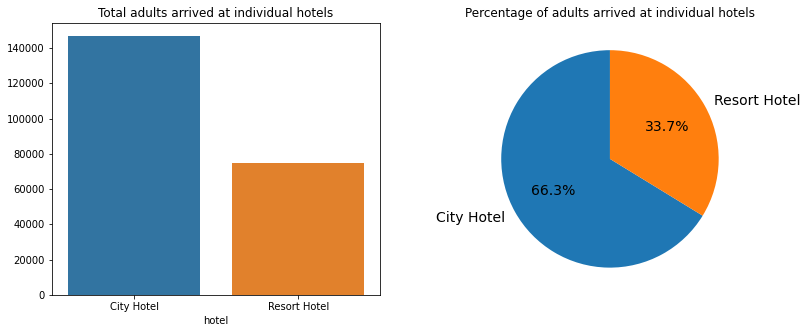

In [178]:
# Plot for adults
df_adults = df.groupby(['hotel'])['adults'].sum()
fig2 = plt.rcParams['figure.figsize'] = 20,5

plt.subplot(1,3,1)
countplot(data = df[['hotel','adults']], x = 'adults', hue = 'hotel', title = 'Hotelwise group data of adults booking')
plt.title('Bookingwise adults count for individual hotels')

plt.subplot(1,3,2)
sns.barplot(x = df_adults.index, y = df_adults.values)
plt.title('Total adults arrived at individual hotels')

plt.subplot(1,3,3)
plt.pie(df_adults, labels=df_adults.index, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of adults arrived at individual hotels')
plt.show()

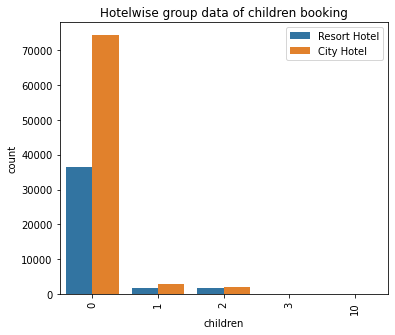

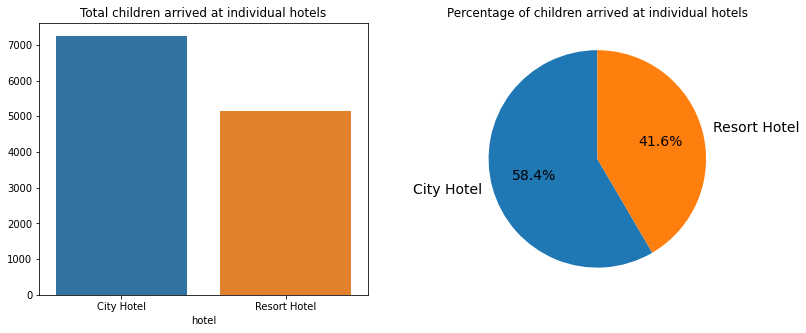

In [180]:
# Plot for children
df_children = df.groupby(['hotel'])['children'].sum()
fig3 = plt.rcParams['figure.figsize'] = 20,5
plt.subplot(1,3,1)
countplot(data = df[['hotel','children']], x = 'children', hue = 'hotel', title = 'Hotelwise group data of children booking')
plt.title('Bookingwise children count for individual hotels')

plt.subplot(1,3,2)
sns.barplot(x = df_children.index, y = df_children.values)
plt.title('Total children arrived at individual hotels')

plt.subplot(1,3,3)
plt.pie(df_children, labels=df_children.index, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of children arrived at individual hotels')
plt.show()

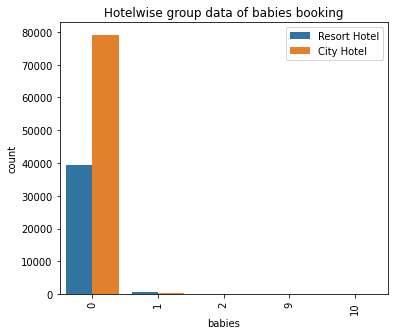

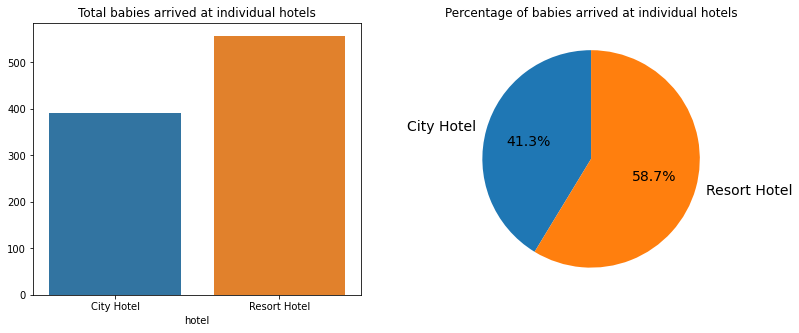

In [181]:
# Plot for babies
df_babies = df.groupby(['hotel'])['babies'].sum()
fig4 = plt.rcParams['figure.figsize'] = 20,5
plt.subplot(1,3,1)
countplot(data = df[['hotel','babies']], x = 'babies', hue = 'hotel', title = 'Hotelwise group data of babies booking')
plt.title('Bookingwise babies count for individual hotels')

plt.subplot(1,3,2)
sns.barplot(x = df_babies.index, y = df_babies.values)
plt.title('Total babies arrived at individual hotels')

plt.subplot(1,3,3)
plt.pie(df_babies, labels=df_babies.index, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.title('Percentage of babies arrived at individual hotels')
plt.show()

The above bar chart is a bit off to visualize the data. Hence, need to plot a different type of graph which might be self explanatory.

**Now, let's have a look at the cancelled booking.**

([<matplotlib.patches.Wedge at 0x7f92c47d9d90>,
 [Text(-1.0101005509609093, -0.43554204957554643, 'Not Cancelled'),
  Text(1.1019278737755371, 0.475136781355142, 'Cancelled')],
 [Text(-0.5509639368877687, -0.23756839067757074, '63.0%'),
  Text(0.6427912597023967, 0.2771631224571661, '37.0%')])

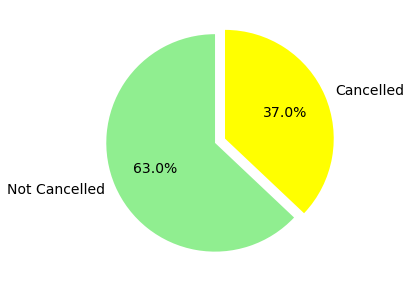

In [182]:
# Plotting the pie chart to view percentage of cancellation.
fig5 = plt.rcParams['figure.figsize'] = 5,5
labels = df['is_canceled'].value_counts().index.tolist()
plot_values = df['is_canceled'].value_counts().tolist()
explode = [0,0.1]
colors = ['lightgreen','yellow']
plt.pie(plot_values, labels = labels, colors=colors, explode = explode, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

So, this indicates that 37 % of the bookings were cancelled.

To further this, we can have a look at the cancellation for individual hotels. Hence, group by the data and complete the task.

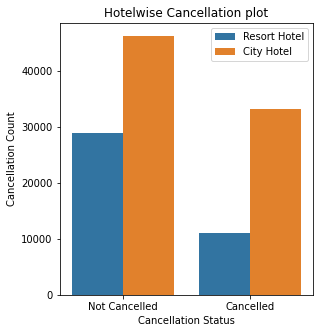

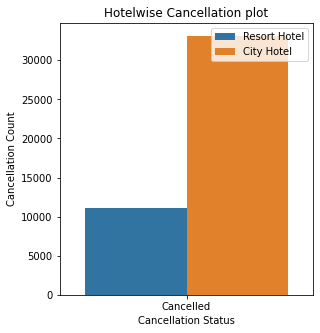

In [217]:
# Plotting the cancellation
fig6 = plt.rcParams['figure.figsize'] = 10,5
plt.subplot(1,2,1)
countplot(data = df[['hotel','is_canceled']], x = 'is_canceled', hue = 'hotel',
          title = 'Hotelwise Cancellation plot' , x_label = 'Cancellation Status', y_label = 'Cancellation Count',
          rotate = 0)

new = df[['hotel','is_canceled']].loc[(df[['hotel','is_canceled']] != 'Not Cancelled').all(axis = 1)]
plt.subplot(1,2,2)
countplot(data = new, x = 'is_canceled', hue = 'hotel',
          title = 'Hotelwise Cancellation plot' , x_label = 'Cancellation Status', y_label = 'Cancellation Count',
          rotate = 0)

In [235]:
# Previously Cancelled
total_bookings_cancelled = df[['previous_cancellations']].loc[(df['previous_cancellations'] != 0)].value_counts().sum()
total_bookings_cancelled

6484

**Now, looking at the arrival period:**

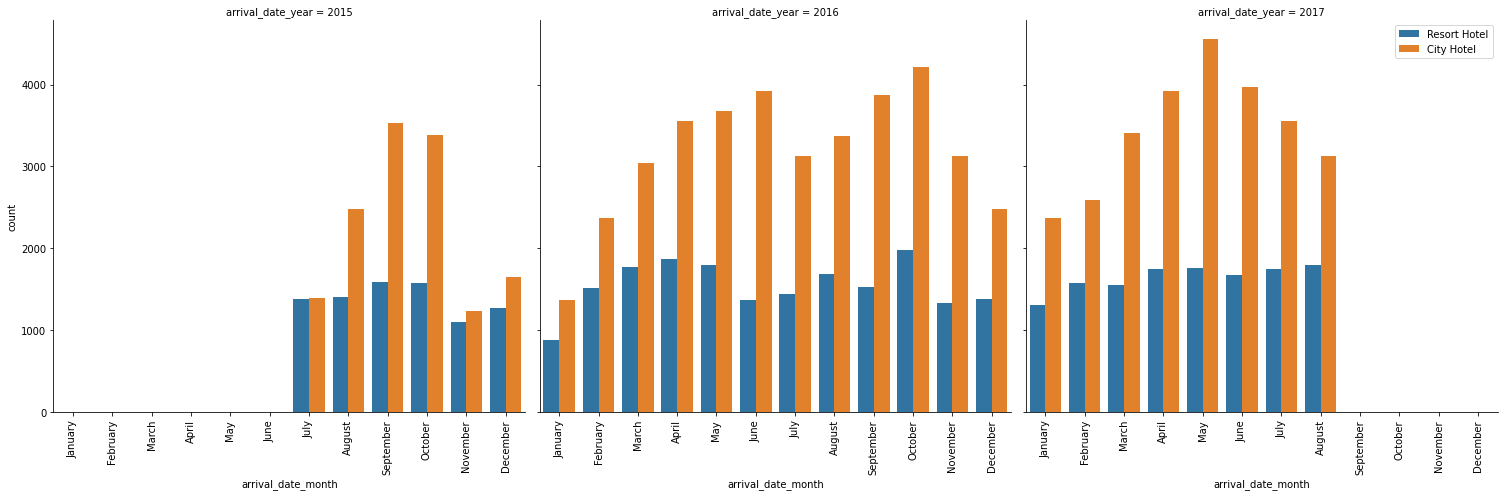

In [239]:
order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
arrival_data = df[['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
              'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights']]
plot = sns.catplot(x = 'arrival_date_month', hue = 'hotel', col = 'arrival_date_year',
            data = arrival_data, kind="count", height=7, aspect=1, order = order_months, legend = False)
plt.legend(loc='upper right')

for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

In [286]:
# Trying for percentage of booking
order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
arrival_data = df[['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
              'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights']]
abc1 = df.groupby(['arrival_date_year', 'arrival_date_month'])['adults'].sum()
abc2 = df.groupby(['arrival_date_year', 'arrival_date_month'])['children'].sum()
abc3 = df.groupby(['arrival_date_year', 'arrival_date_month'])['babies'].sum()
# plot = sns.catplot(x = 'arrival_date_month', hue = 'hotel', col = 'arrival_date_year',
#             data = arrival_data, kind="count", height=7, aspect=1, order = order_months, legend = False)
# plt.legend(loc='upper right')

# for axes in plot.axes.flat:
#     _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
# plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [287]:
abc1

adults  children  babies
arrival_date_year arrival_date_month                          
2015              August                7545       428      67
                  December              5208       216      46
                  July                  5423       266      26
                  November              3714        72      21
                  October               8860       192      32
                  September             9512       183      31
2016              April                 9994       453      24
                  August               10351      1168      81
                  December              7174       520      32
                  February              6866       322      27
                  January               3696       116      23
                  July                  9118       924      59
                  June                  9637       423      41
                  March                 8784       443      34
                  May                   9982       406      32
                  November              7774       207      24
                  October              11419       511      30
                  September            10169       415      56
2017              April                10812       688      29
                  August                9899      1184      48
                  February              7584       468      32
                  January               6328       336      25
                  July                 10623      1132      36
                  June                 10716       634      30
                  March                 8891       257      23
                  May                  11557       439      40

From this we can see the trend in arrival wrt month for all the three years.

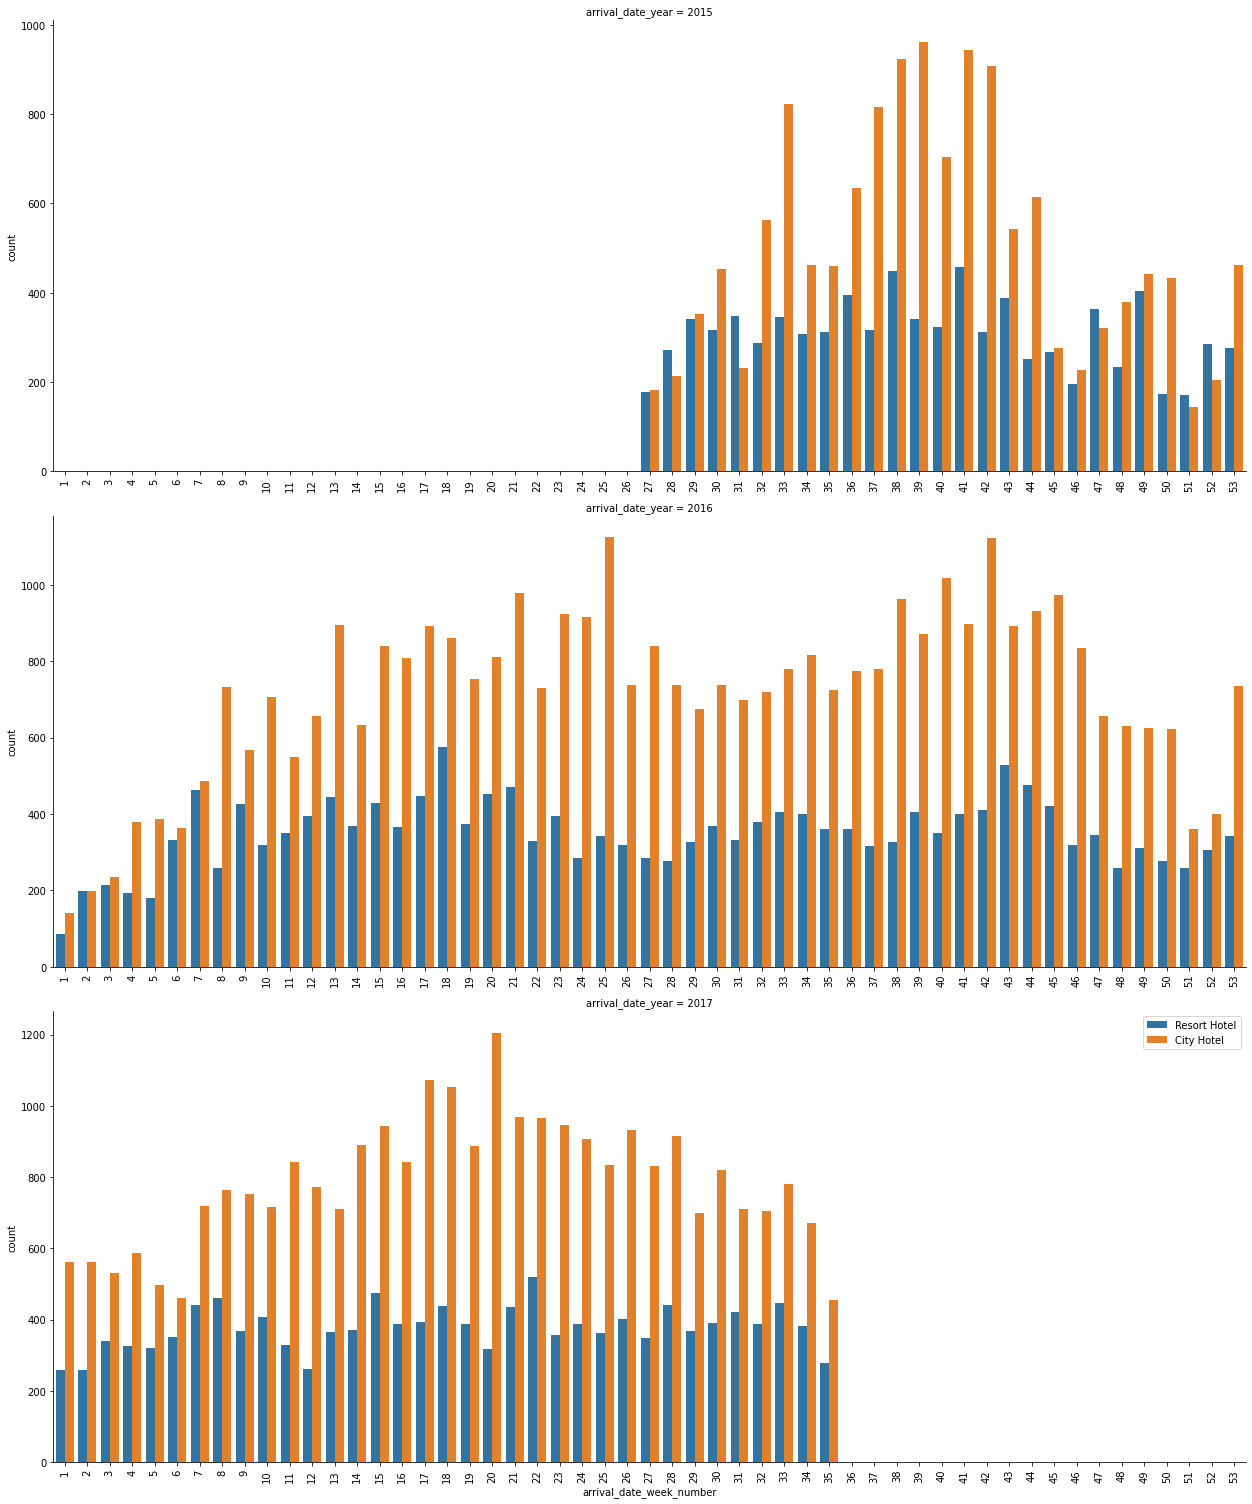

In [240]:
week_order = list(range(1,54))
plot = sns.catplot(x = 'arrival_date_week_number', hue = 'hotel', col = 'arrival_date_year',col_wrap=1, 
            data = arrival_data, kind="count", height=7, aspect=2.5, order = week_order, legend = False, legend_out = True, sharex=False, sharey=False)
plt.legend(loc='upper right')
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

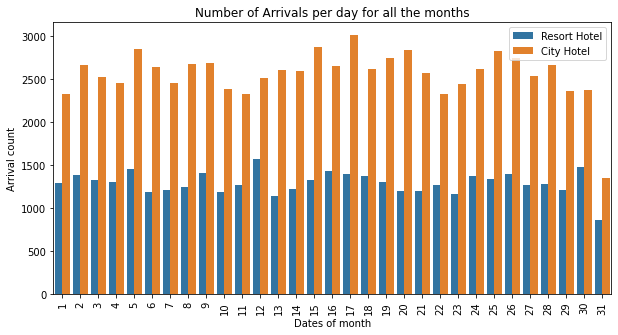

In [246]:
# Arrival data as per day of month, combined for all the months:
countplot(data = arrival_data, x = 'arrival_date_day_of_month', hue = 'hotel',
          title = 'Number of Arrivals per day for all the months' , x_label = 'Dates of month', y_label = 'Arrival count',
          rotate = 90)

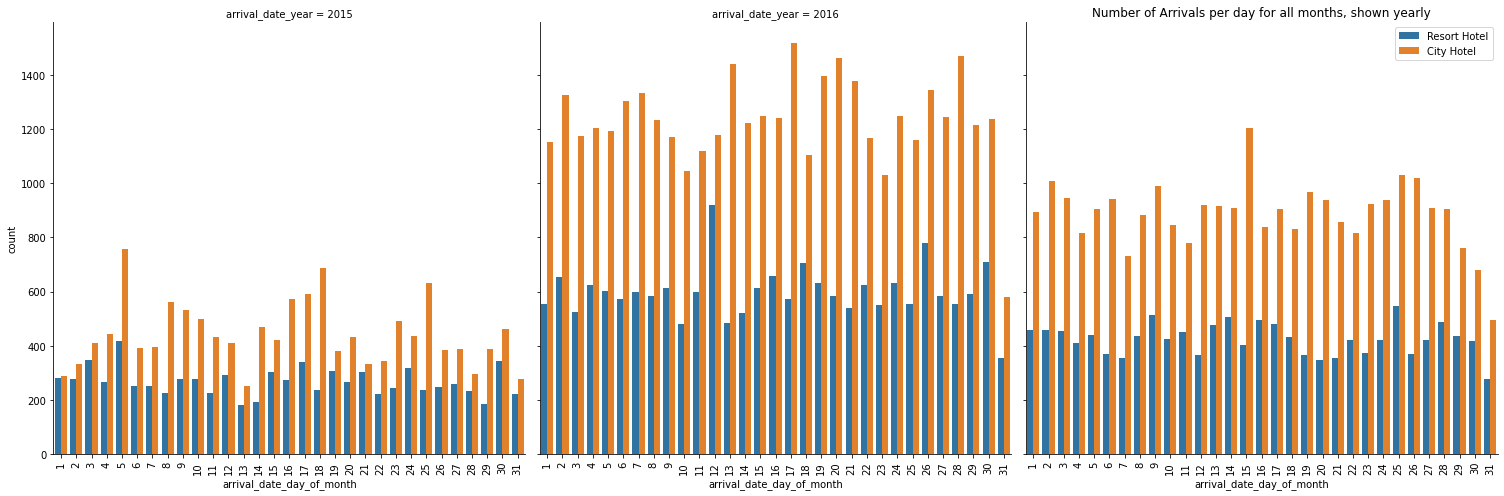

In [247]:
# Number of Arrivals per day for all months, shown yearly
plot = sns.catplot(x = 'arrival_date_day_of_month', hue = 'hotel', col = 'arrival_date_year',
            data = arrival_data, kind="count", height=7, aspect=1, legend = False)
plt.legend(loc='upper right')
plt.title('Number of Arrivals per day for all months, shown yearly')
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

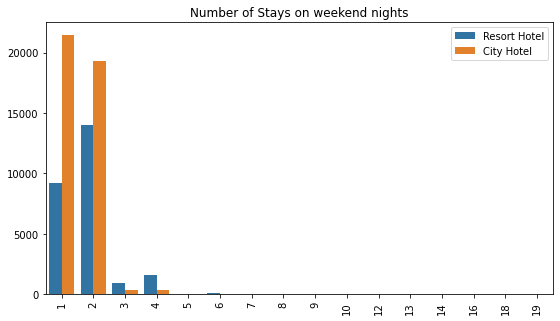

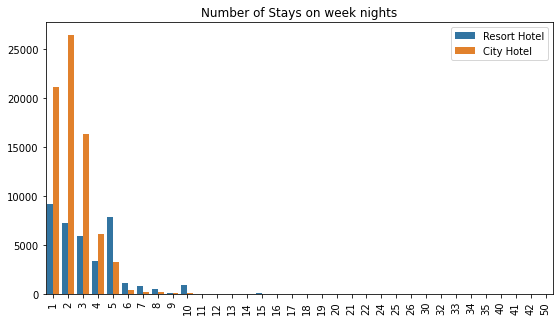

In [258]:
# To show weekend night stays vs week night stays.
fig7 = plt.rcParams['figure.figsize'] = 20,5
plt.subplot(1,2,1)
countplot(data = arrival_data.loc[(arrival_data['stays_in_weekend_nights'] != 0)],
          x = 'stays_in_weekend_nights', hue = 'hotel', title = 'Number of Stays on weekend nights')

plt.subplot(1,2,2)
countplot(data = arrival_data.loc[(arrival_data['stays_in_week_nights'] != 0)],
          x = 'stays_in_week_nights', hue = 'hotel', title = 'Number of Stays on week nights')

In [259]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

**Analysing the bookings for individual market segments**

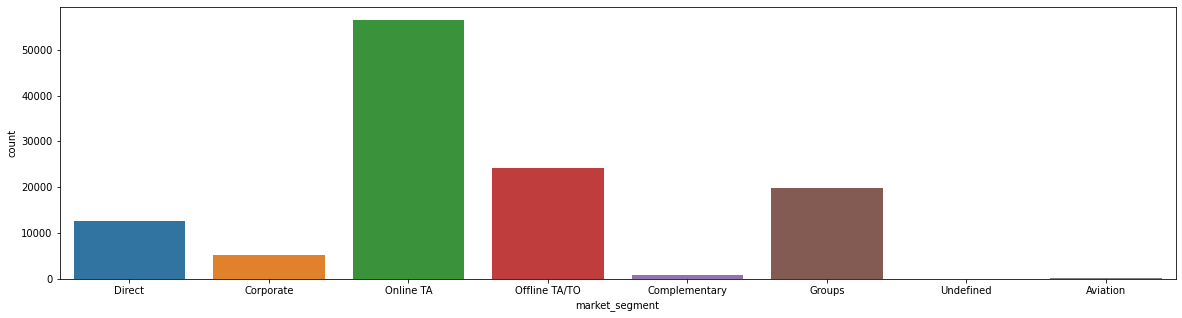

In [260]:
# Total bookings count from individual market segement
sns.countplot(data = df, x = 'market_segment')

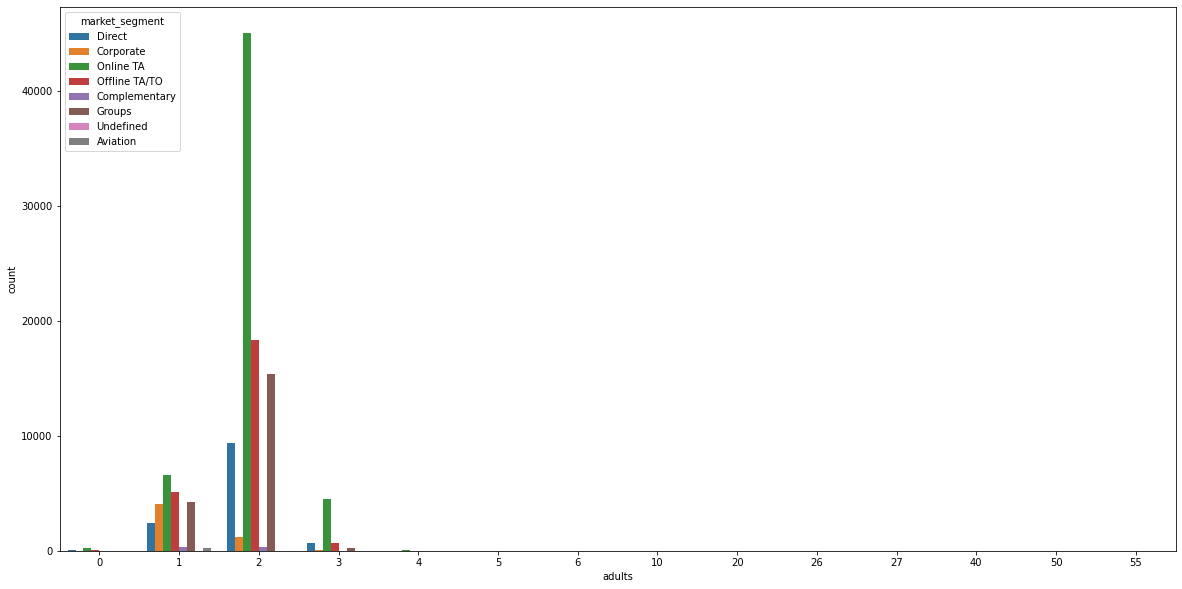

In [261]:
# Adultswise market segment
plt.figure(figsize=(20,10))
sns.countplot(data = df, x = 'adults', hue = 'market_segment')

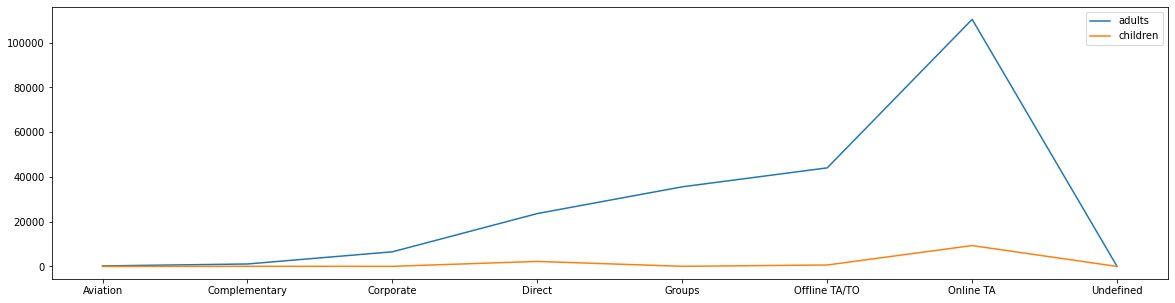

In [262]:
# This is a better graph as it counts the total number of adults/children against each market segment.
m1 = df.groupby('market_segment').sum()
plt.plot(m1['adults'])
plt.plot(m1['children'])
plt.legend(['adults', 'children'])

In [263]:
m1

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
market_segment,,,,,,,,,,,,,,,,,,,
Aviation,1053,477902,5946,3723,259,596,238,0,0,64,13,102,62,3825,32436,0,23733.68,6,27
Complementary,9872,1497937,21149,11455,261,963,1104,61,22,230,162,1525,247,10289,23899,39,2144.57,84,693
Corporate,117155,10675111,137928,83216,2321,8761,6545,53,16,1474,888,10900,1627,143640,768496,819,367255.65,593,1217
Direct,628524,25416011,333966,200521,10793,29619,23645,2248,289,796,233,1729,4989,784216,54142,511,1455301.88,2121,7262
Groups,3704124,39938730,539962,317581,15626,43659,35598,58,13,270,5428,316,4196,1176275,359804,126853,1574567.82,282,1727
Offline TA/TO,3269673,48825092,702594,377999,25515,69033,44060,653,178,379,2770,559,3909,2107726,31245,148771,2115645.48,554,6491
Online TA,4687519,113874118,1501641,891649,55970,145878,110441,9330,431,597,907,1237,11370,4707782,16424,129,6618938.52,3824,50795
Undefined,3,4030,64,8,1,2,5,0,0,0,0,0,0,0,0,0,30.00,0,3


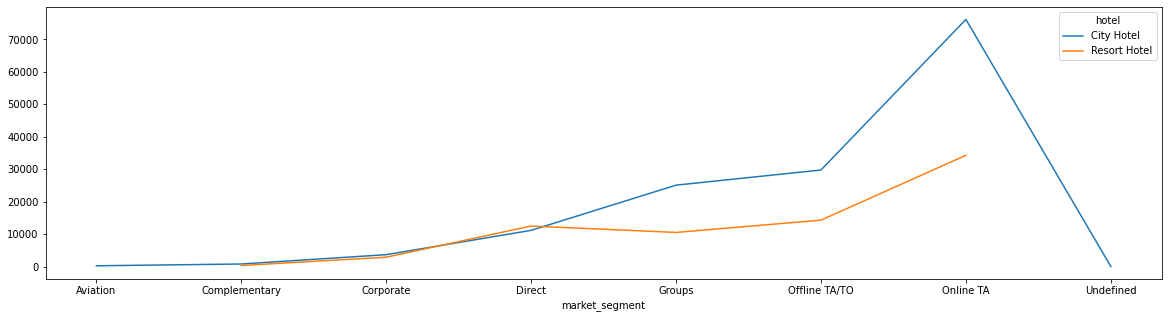

In [265]:
# To plot hotelwise data of adults belonging to specific market_segment.
m2 = df.groupby(['market_segment', 'hotel']).sum()['adults']
m2.unstack().plot()

In [277]:
# Defining new df for distribution channel
distribution_channel1 = df.groupby(['hotel', 'distribution_channel']).sum()['adults']

# Extracting pandas series out of this df to use it in plot
d_c = distribution_channel1[:4]
d_r = distribution_channel1[5:]

Text(0.5, 1.0, 'For Resort Hotel')

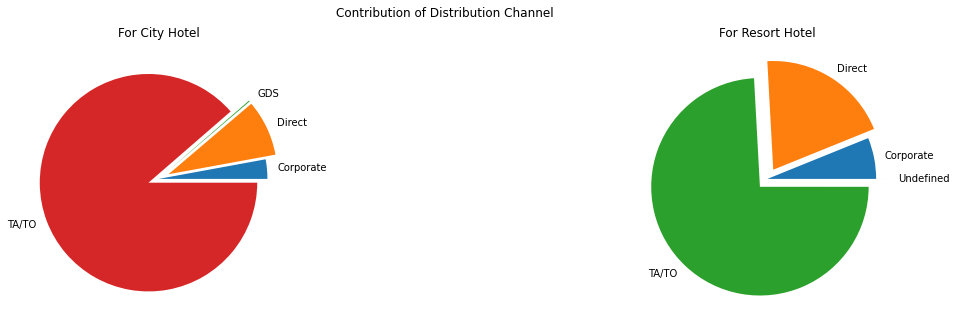

In [280]:
# Plotting a pie chart of this data
label1 = ['Corporate', 'Direct', 'GDS', 'TA/TO'] # Need to search for an option to add labels automatically.
label2 = ['Corporate', 'Direct', 'TA/TO', 'Undefined']

explode = (0, 0.1, 0.1, 0.1)
plt.suptitle('Contribution of Distribution Channel') # To add the main title to the graph
# Need to remove this extra gap

# Subplot1: Pie chart for City Hotel
plt.subplot(1, 2, 1)
plt.pie(d_c, labels=label1, explode = explode)
plt.title('For City Hotel')

# Subplot2: Pie chart for Resort Hotel
plt.subplot(1, 2, 2)
plt.pie(d_r, labels=label2, explode = explode)
plt.title('For Resort Hotel')

For both the hotels, the distribution channel 'TA/TO' contributed the maximum.

**Now, looking for Repeated Customers**

In [269]:
# Finding repeated customers
repeated_customer = df.copy()
repeated_customer['is_repeated_guest'] = repeated_customer['is_repeated_guest'].replace([0,1], ['No', 'Yes'])

In [270]:
# Counting the total repeated customers
repeated_customer['is_repeated_guest'].value_counts()

No     115580
Yes      3810
Name: is_repeated_guest, dtype: int64

In [271]:
hotelwise_repeated_customers = repeated_customer.groupby(['is_repeated_guest', 'hotel']).count()['adults']
print(hotelwise_repeated_customers)

is_repeated_guest  hotel       
No                 City Hotel      77298
                   Resort Hotel    38282
Yes                City Hotel       2032
                   Resort Hotel     1778
Name: adults, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


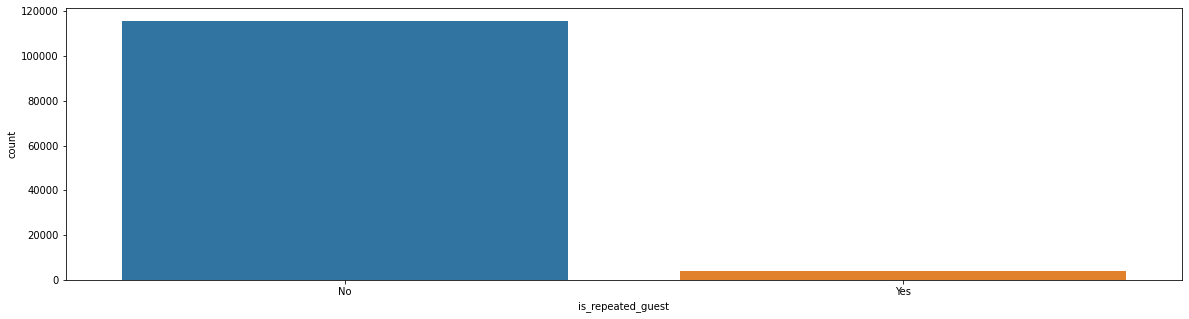

In [272]:
# plot the repeated customers count plot (combied for hotels)
sns.countplot(repeated_customer['is_repeated_guest'])

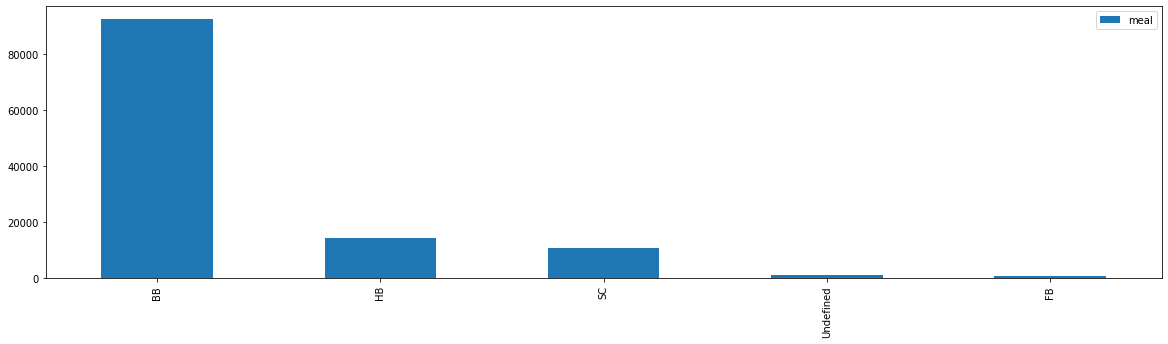

In [273]:
# Plot for Meal types for both the hotels combined
df['meal'].value_counts().plot(kind = 'bar')
plt.legend(loc='upper right')